The purpose of the case study is to classify a given silhouette as one of four different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

Four "Corgie" model vehicles were used for the experiment: a double decker bus, Cheverolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.

The purpose is to classify a given silhouette as one of three types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

from sklearn.decomposition import PCA
from scipy.stats import zscore

In [4]:
# Read the dataset

veh_df = pd.read_csv("vehicle.csv")  

In [5]:
veh_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,bus
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,bus
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,van
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,van
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,car


The target column 'class' is non-numeric, this can be replaced with unique numeric values for each class

In [6]:
veh_df = veh_df.replace({'van': 1, 'car' :2, 'bus' :3})

In [7]:
veh_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,2
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3
5,107,NaN,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,3
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,3
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,1
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,1
9,93,44.0,98.0,NaN,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,2


In [8]:
veh_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

In [9]:
veh_df = veh_df.apply(lambda x: x.fillna(x.median()),axis=0)

In [10]:
veh_df

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,1
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,1
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,2
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,1
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,3
5,107,44.0,106.0,172.0,50.0,6,255.0,26.0,28.0,169,280.0,957.0,264.0,85.0,5.0,9.0,181.0,183,3
6,97,43.0,73.0,173.0,65.0,6,153.0,42.0,19.0,143,176.0,361.0,172.0,66.0,13.0,1.0,200.0,204,3
7,90,43.0,66.0,157.0,65.0,9,137.0,48.0,18.0,146,162.0,281.0,164.0,67.0,3.0,3.0,193.0,202,1
8,86,34.0,62.0,140.0,61.0,7,122.0,54.0,17.0,127,141.0,223.0,112.0,64.0,2.0,14.0,200.0,208,1
9,93,44.0,98.0,167.0,62.0,11,183.0,36.0,22.0,146,202.0,505.0,152.0,64.0,4.0,14.0,195.0,204,2


In [11]:
veh_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
compactness,846.0,93.678487,8.234474,73.0,87.00,93.0,100.00,119.0
circularity,846.0,44.823877,6.134272,33.0,40.00,44.0,49.00,59.0
distance_circularity,846.0,82.100473,15.741569,40.0,70.00,80.0,98.00,112.0
radius_ratio,846.0,168.874704,33.401356,104.0,141.00,167.0,195.00,333.0
pr.axis_aspect_ratio,846.0,61.677305,7.882188,47.0,57.00,61.0,65.00,138.0
max.length_aspect_ratio,846.0,8.567376,4.601217,2.0,7.00,8.0,10.00,55.0
scatter_ratio,846.0,168.887707,33.197710,112.0,147.00,157.0,198.00,265.0
elongatedness,846.0,40.936170,7.811882,26.0,33.00,43.0,46.00,61.0
pr.axis_rectangularity,846.0,20.580378,2.588558,17.0,19.00,20.0,23.00,29.0
max.length_rectangularity,846.0,147.998818,14.515652,118.0,137.00,146.0,159.00,188.0


Distribution of the Target variable 'Class'

In [12]:
veh_df.groupby(["class"]).count()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
class,,,,,,,,,,,,,,,,,,
1,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199,199
2,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429,429
3,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218,218


There are lot of data for the class 'Cars', so the model's ability in predicting the class 'cars' would be better than other class of vehicles

# Bivariate analysis

In [17]:
sns.pairplot(veh_df, diag_kind = 'kde')

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


From the pairplot we can clearly see that many independent variables have more clusters. With the target column we can clearly say there are 3 clusters. We also can see good correlation between most independnet variables and some have skewed distribution with outliers.

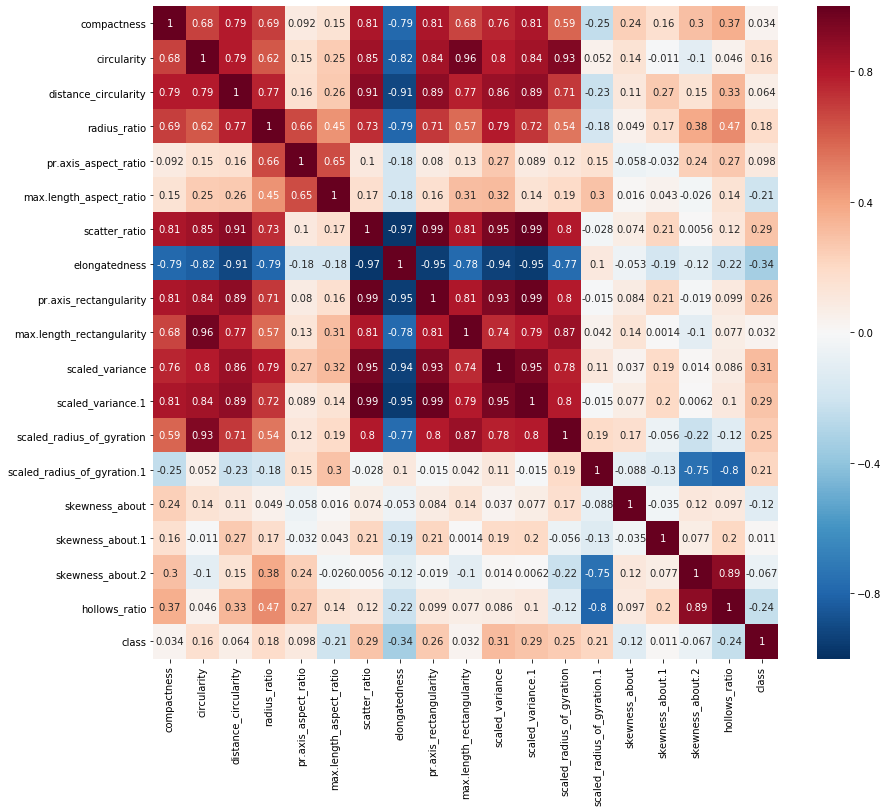

In [18]:
correlation = veh_df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(correlation,annot=True, linewidth=0, vmin=-1, cmap="RdBu_r")

From the heat map we can clearly see that few independent columns have better corrleation among them.
For example, we can see that scaled variance and scatter_ratio has correlation of 0.99, which means both denote same features, so removal of any one column can be done for models better performance.
This can be decided by using PCA in elbow method

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000060F3A52EF0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000060F3DED630>]], dtype=object)

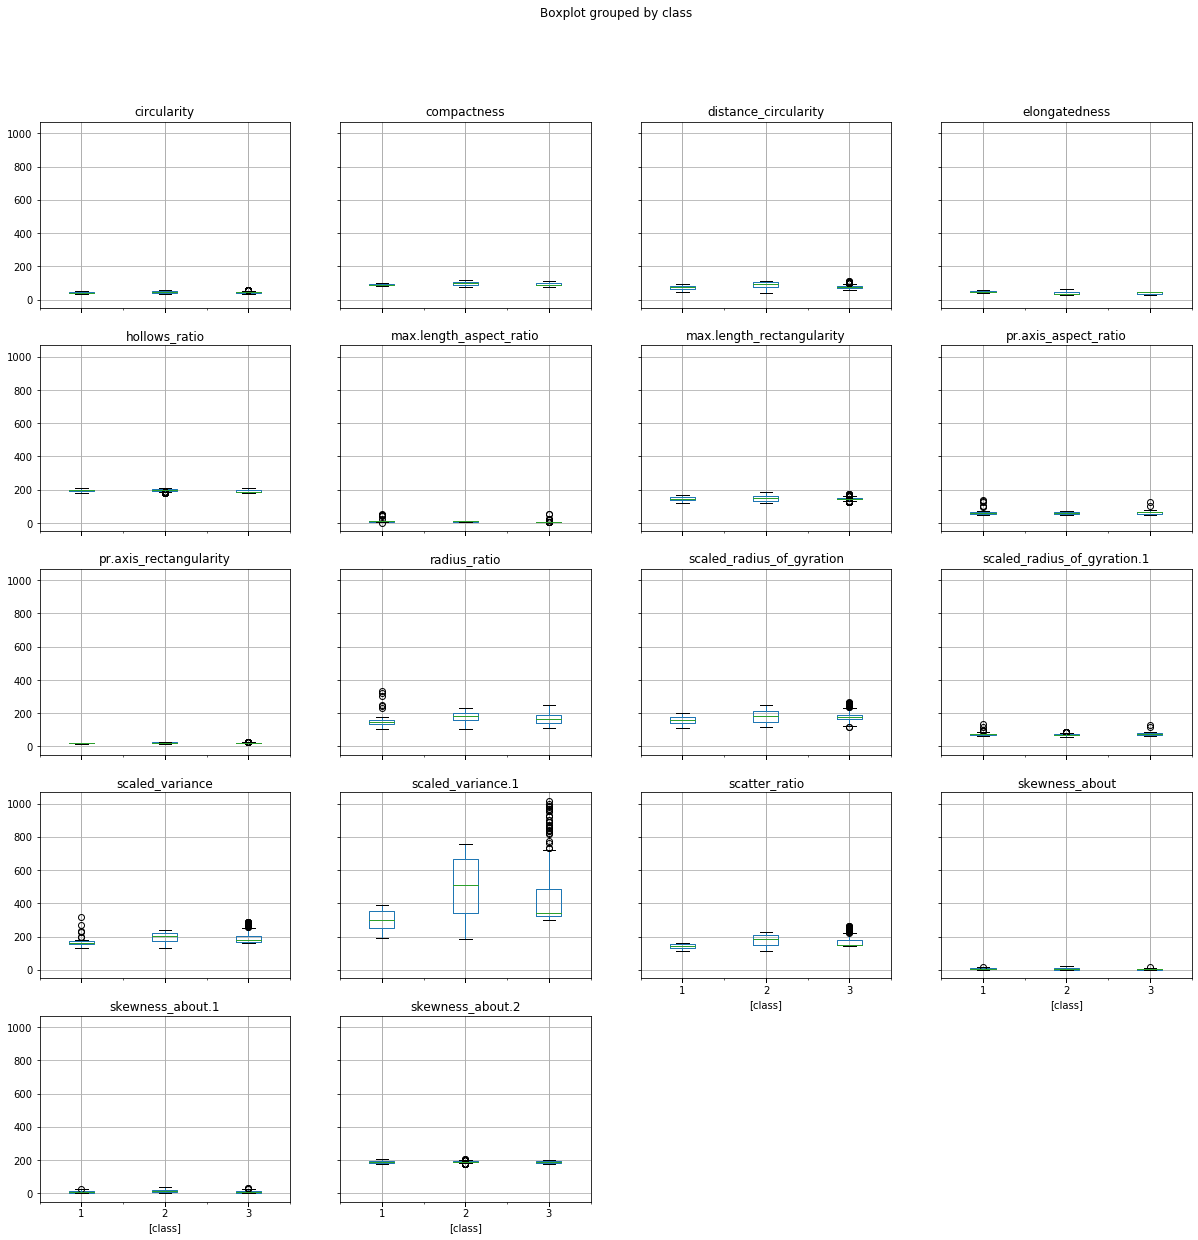

In [21]:
#Finding Outliers
veh_df.boxplot(by = 'class', figsize=(20,20))

By analyzing the variables using boxplot we can clearly see that there are a lot of outliers in lot of columns.
To clearly understand which class has more outliers we use boxplot with the corresponding target variable. This clearly shows that class 'bus' has got more outliers compared to other class vehicles.
This can be effectively reduced by replacing it with their suitable column's median.
But replacing it with their medians will certainly reduce the standard deviation, which inturn cause a new outlier
So outlier replacement should be done only if needed, to reduce the new outlier techniques like capping and correlation with two columns can be done.

In [23]:
#Remove the outliers by taking anything above 3 sd from mean
#Take logarithmic transformation, it would reduce the variation
mean = np.mean(veh_df['radius_ratio'])
std = np.std(veh_df['radius_ratio'])

In [24]:
veh_df['radius_ratio'] = np.where(veh_df['radius_ratio'] > (mean+3*std), (mean+3*std), veh_df['radius_ratio'])
veh_df['radius_ratio'].value_counts()

197.000000    17
162.000000    15
169.000000    13
125.000000    13
150.000000    12
130.000000    12
186.000000    12
139.000000    12
199.000000    12
209.000000    11
167.000000    11
141.000000    11
136.000000    11
133.000000    11
191.000000    11
194.000000    11
201.000000    11
183.000000    10
123.000000    10
140.000000    10
160.000000    10
203.000000    10
120.000000     9
193.000000     9
164.000000     9
154.000000     9
184.000000     9
159.000000     9
170.000000     9
158.000000     9
              ..
225.000000     4
113.000000     4
117.000000     4
269.019531     3
124.000000     3
200.000000     3
134.000000     3
110.000000     3
210.000000     3
223.000000     3
216.000000     3
198.000000     3
227.000000     2
234.000000     2
246.000000     2
224.000000     2
118.000000     2
214.000000     2
218.000000     2
238.000000     1
104.000000     1
112.000000     1
226.000000     1
250.000000     1
109.000000     1
232.000000     1
252.000000     1
105.000000    

In [26]:
mean1 = np.mean(veh_df['pr.axis_aspect_ratio'])
mean2 = np.mean(veh_df['max.length_aspect_ratio'])
mean3 = np.mean(veh_df['scaled_variance'])
mean4 = np.mean(veh_df['scaled_variance.1'])
mean5 = np.mean(veh_df['scaled_radius_of_gyration.1'])
mean6 = np.mean(veh_df['skewness_about'])
mean7 = np.mean(veh_df['skewness_about.1'])
std1 = np.std(veh_df['pr.axis_aspect_ratio'])
std2 = np.std(veh_df['max.length_aspect_ratio'])
std3 = np.std(veh_df['scaled_variance'])
std4 = np.std(veh_df['scaled_variance.1'])
std5 = np.std(veh_df['scaled_radius_of_gyration.1'])
std6 = np.std(veh_df['skewness_about'])
std7 = np.std(veh_df['skewness_about.1'])

In [27]:
veh_df['pr.axis_aspect_ratio'] = np.where(veh_df['pr.axis_aspect_ratio'] > (mean1+3*std1), (mean1+3*std1), veh_df['pr.axis_aspect_ratio'])
veh_df['max.length_aspect_ratio'] = np.where(veh_df['max.length_aspect_ratio'] > (mean2+3*std2), (mean2+3*std2), veh_df['max.length_aspect_ratio'])
veh_df['scaled_variance'] = np.where(veh_df['scaled_variance'] > (mean3+3*std3), (mean3+3*std3), veh_df['scaled_variance'])
veh_df['scaled_variance.1'] = np.where(veh_df['scaled_variance.1'] > (mean4+3*std4), (mean4+3*std4), veh_df['scaled_variance.1'])
veh_df['scaled_radius_of_gyration.1'] = np.where(veh_df['scaled_radius_of_gyration.1'] > (mean5+3*std5), (mean5+3*std5), veh_df['scaled_radius_of_gyration.1'])
veh_df['skewness_about'] = np.where(veh_df['skewness_about'] > (mean6+3*std6), (mean6+3*std6), veh_df['skewness_about'])
veh_df['skewness_about.1'] = np.where(veh_df['skewness_about.1'] > (mean7+3*std7), (mean7+3*std7), veh_df['skewness_about.1'])

In [28]:
veh_new = veh_df.drop(['class'], axis =1)
veh_new=veh_new.apply(zscore)
veh_new

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,0.160580,0.518073,0.057177,0.284787,1.746604,0.637986,-0.207598,0.136262,-0.224342,0.758332,-0.402711,-0.341979,0.285705,-0.343765,-0.073112,0.381517,-0.312012,0.183957
1,-0.325470,-0.623732,0.120741,-0.847352,-0.721449,0.260478,-0.599423,0.520519,-0.610886,-0.344578,-0.595506,-0.620412,-0.513630,-0.044102,0.540811,0.157239,0.013265,0.452977
2,1.254193,0.844303,1.519141,1.233336,0.759383,0.637986,1.148719,-1.144597,0.935290,0.689401,1.107521,1.112691,1.392477,0.105729,1.564016,-0.403455,-0.149374,0.049447
3,-0.082445,-0.623732,-0.006386,-0.296582,0.265772,0.260478,-0.750125,0.648605,-0.610886,-0.344578,-0.916832,-0.739741,-1.466683,-1.392585,-0.073112,-0.291316,1.639649,1.529056
4,-1.054545,-0.134387,-0.769150,1.110942,3.936572,5.305070,-0.599423,0.520519,-0.610886,-0.275646,1.685908,-0.648824,0.408680,3.377480,0.540811,-0.179178,-1.450481,-1.699181
5,1.618730,-0.134387,1.519141,0.101197,-1.873208,-0.872047,2.595457,-1.913112,2.868010,1.447652,2.939079,2.942395,2.745198,1.903706,-0.277753,-0.403455,-1.287842,-1.699181
6,0.403605,-0.297502,-0.578459,0.131795,0.594846,-0.872047,-0.478861,0.136262,-0.610886,-0.344578,-0.402711,-0.444261,-0.083219,-0.943091,1.359375,-1.300566,1.802287,1.125526
7,-0.446982,-0.297502,-1.023405,-0.357779,0.594846,0.260478,-0.961108,0.904777,-0.997430,-0.137782,-0.852567,-0.898845,-0.329168,-0.793259,-0.687035,-1.076288,0.663818,0.856507
8,-0.933032,-1.765536,-1.277659,-0.877951,-0.063302,-0.494538,-1.413213,1.673292,-1.383974,-1.447489,-1.527352,-1.228419,-1.927838,-1.242754,-0.891676,0.157239,1.802287,1.663566
9,-0.082445,-0.134387,1.010632,-0.051795,0.101235,1.015495,0.425350,-0.632254,0.548746,-0.137782,0.432737,0.373991,-0.698092,-1.242754,-0.482394,0.157239,0.989095,1.125526


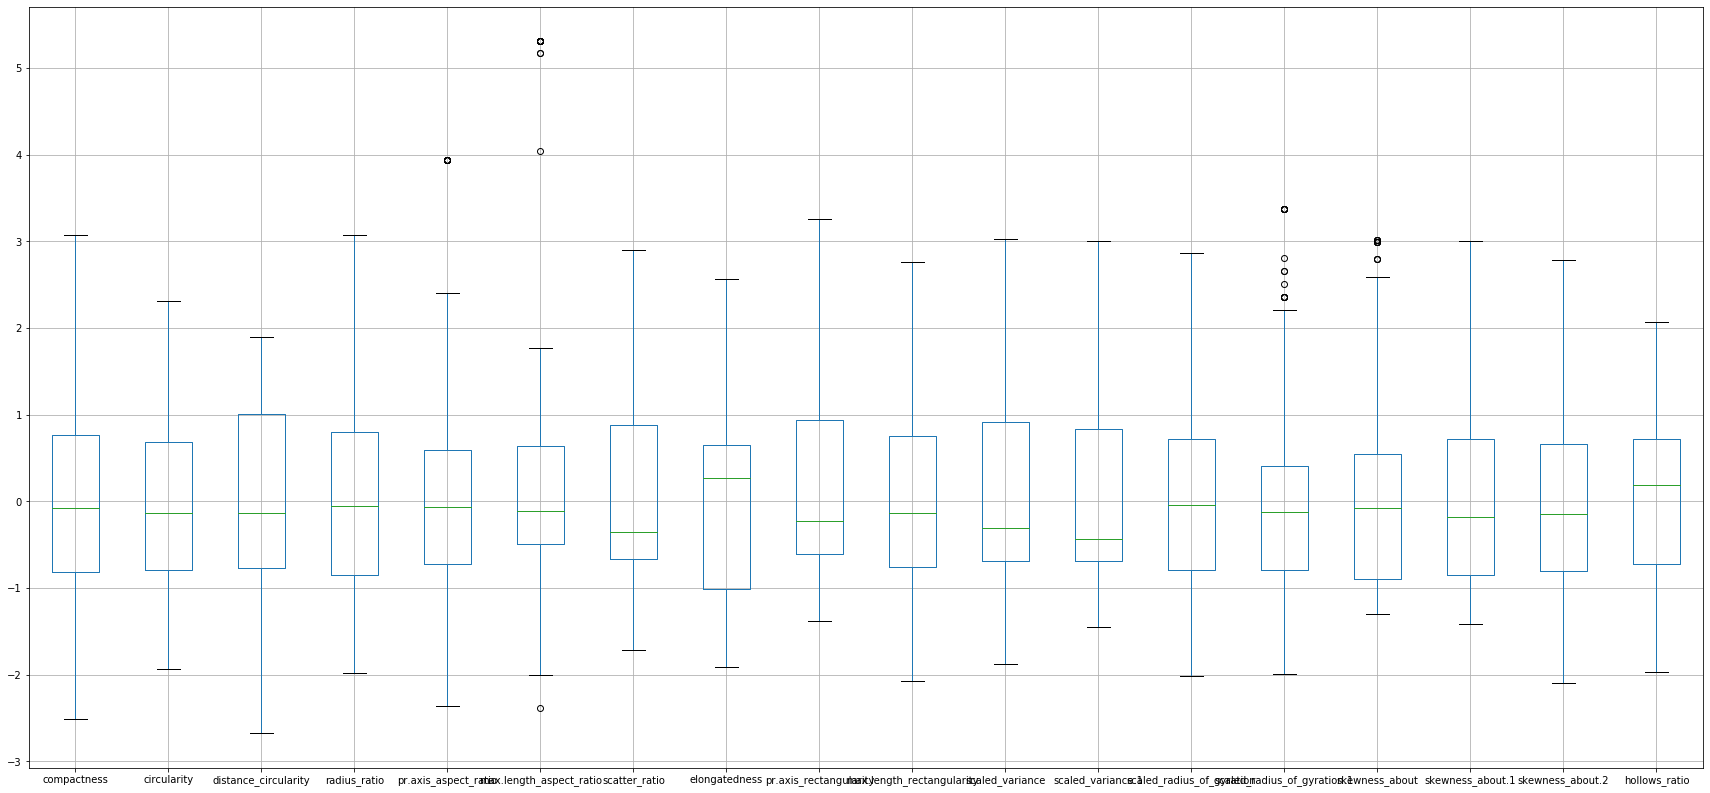

In [30]:
veh_new.boxplot(figsize=(30,14))

From the new box plot we can clearly see that the no of columns with outliers have been reduced, which in turn significantly improves the model's performance

In [32]:
#covariance matrix for identifying Principal components
cov_matrix = np.cov(veh_new.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[ 1.00118343  0.68569786  0.79086299  0.70695158  0.15038365  0.33281482
   0.81358214 -0.78968322  0.81465658  0.67694334  0.76695694  0.81536724
   0.58593517 -0.26455411  0.23624215  0.15724421  0.29889034  0.36598446]
 [ 0.68569786  1.00118343  0.79325751  0.63276669  0.19047167  0.43252555
   0.8489411  -0.82244387  0.84439802  0.96245572  0.80130287  0.83730174
   0.92691166  0.05423606  0.14471109 -0.011258   -0.10455005  0.04640562]
 [ 0.79086299  0.79325751  1.00118343  0.78352494  0.21533212  0.49147254
   0.90614687 -0.9123854   0.89408198  0.77544391  0.86742565  0.8879797
   0.70660663 -0.24600539  0.11421226  0.26590392  0.14627113  0.33312625]
 [ 0.70695158  0.63276669  0.78352494  1.00118343  0.68368978  0.48000798
   0.75329052 -0.80899322  0.72708064  0.57798469  0.79643628  0.73851167
   0.54651753 -0.29897819  0.05127823  0.17798964  0.39359792  0.48257577]
 [ 0.15038365  0.19047167  0.21533212  0.68368978  1.00118343  0.33844364
   0.15890944

In [33]:
#Identifying eigen values and eigen vector
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[ -2.73320403e-01   9.94804645e-02  -1.93402183e-01  -1.13463198e-01
   -6.03802820e-02   1.39253057e-02   3.63306683e-01  -6.65603267e-01
    4.27394261e-01  -2.61324448e-01  -4.30123996e-02   5.83678142e-02
    1.51211813e-01  -6.07630852e-02   1.08067046e-02  -4.52102368e-02
    3.64619647e-02  -1.25158991e-03]
 [ -2.89935900e-01  -1.28548341e-01   8.57156350e-02  -1.76114341e-01
    3.64520332e-03  -1.53175583e-01  -3.85550964e-01  -1.39026707e-01
    1.87421721e-02   7.49015142e-02   1.06672344e-03  -2.80994842e-01
   -5.71107826e-02  -2.42895418e-01   9.41620227e-03   4.24666208e-01
    5.79072000e-01   8.16090928e-02]
 [ -3.03155809e-01   5.56302751e-02  -8.64819239e-02   5.06699540e-02
    8.25149826e-02  -1.02792752e-01   3.56290663e-02   3.76881284e-01
    2.32542277e-01  -1.45025732e-01  -7.59011963e-01   7.20578132e-02
   -5.47006773e-02   2.22389222e-01  -8.04833705e-03   1.58814892e-01
   -4.04628270e-03  -1.09061788e-02]
 [ -2.70082447e-01   2.00031706

In [34]:
#Finding variance and cumulative variance by each eigen vector
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 53.23676872  71.17273928  78.30285657  84.86671823  89.84672563
  93.93022865  96.04269453  97.28996343  98.14472514  98.66825162
  99.03156256  99.30811427  99.52511187  99.70247097  99.81847595
  99.9270879   99.98335094 100.        ]


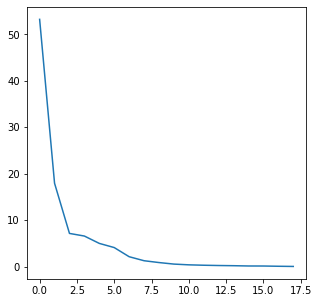

In [35]:
plt.figure(figsize=(5,5))
plt.plot(var_exp)

We can observe that their is steep drop in variance explained with increase in number of PCs.
We will proceed with 7 components but depending on requirement 95% variation even 6 components will do good

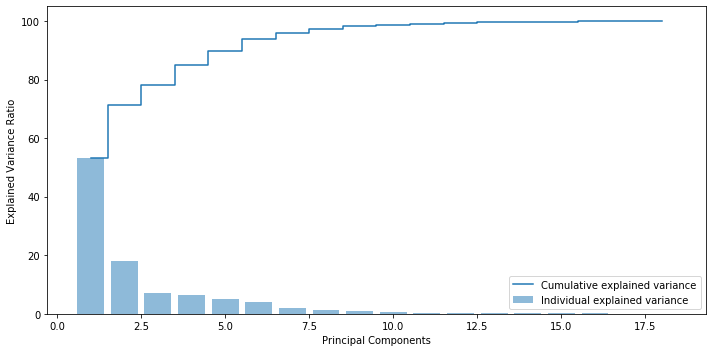

In [37]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

Sorting the eigen values and eigen vectors for Reducing the variables using PCA

In [38]:
# Sort eigenvalues in descending order

# Make a set of (eigenvalue, eigenvector) pairs
eig_pairs = [(eig_vals[index], eig_vecs[:,index]) for index in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) pairs from highest to lowest with respect to eigenvalue
eig_pairs.sort()

eig_pairs.reverse()
print(eig_pairs)

# Extract the descending ordered eigenvalues and eigenvectors
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eig_vals))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eig_vals))]


[(9.5939587456084254, array([-0.2733204 , -0.2899359 , -0.30315581, -0.27008245, -0.09451257,
       -0.15439036, -0.31311001,  0.3110622 , -0.30986212, -0.28026798,
       -0.30486355, -0.30964343, -0.26725294,  0.03584142, -0.04129673,
       -0.05843059, -0.03460685, -0.08004458])), (3.2322953822697365, array([ 0.09948046, -0.12854834,  0.05563028,  0.20003171,  0.22961731,
        0.07717526, -0.06678251,  0.00393983, -0.07926855, -0.11918938,
       -0.06834405, -0.07286057, -0.20920404, -0.49372077,  0.04298573,
        0.10325269,  0.51627014,  0.51988127])), (1.2849399535771482, array([-0.19340218,  0.08571564, -0.08648192,  0.24538287,  0.64774981,
        0.39036428, -0.11368253,  0.04966148, -0.13205252,  0.08394765,
       -0.00688789, -0.12982102,  0.08086277,  0.18358919, -0.24178678,
       -0.39260799, -0.07091648, -0.0306865 ])), (1.1828933172432869, array([-0.1134632 , -0.17611434,  0.05066995,  0.11172935,  0.10959352,
       -0.01204334,  0.07927203, -0.08306297,  0

In [39]:
P_reduce = np.array(eigvectors_sorted[0:7])   # Reducing from 18 to 7 dimension space

veh_new_4D = np.dot(veh_new,P_reduce.T)   # projecting original data into principal component dimensions

veh_data_df = pd.DataFrame(veh_new_4D)  # converting array to dataframe for pairplot

In [40]:
from sklearn import model_selection
y = veh_df.iloc[:,18]
test_size = 0.30 # taking 70:30 training and test set


seed = 7  # Random numbmer seeding for reapeatability of the code
X_train, X_test, y_train, y_test = model_selection.train_test_split(veh_data_df, y, test_size=test_size, random_state=seed)

In [41]:
# Let us build a linear regression model on the PCA dimensions 

# Import Linear Regression machine learning library
from sklearn.linear_model import LinearRegression

regression_model = LinearRegression()
regression_model.fit(X_train, y_train)

regression_model.coef_

array([-0.04752665, -0.07886984,  0.01313511,  0.13510618, -0.30546465,
        0.32110713, -0.10655615])

In [42]:
regression_model.intercept_

2.0128027114734715

In [43]:
regression_model.score(X_test, y_test)

0.38296434355265618

For analysis  the original data set is compared with data set after removing few variables using PCA. The test scores were found have big difference, that original data set has better score than modified dataset

In [45]:
veh_df1 = veh_df.drop(['class'], axis =1)

In [46]:
X_train1, X_test1, y_train1, y_test1 = model_selection.train_test_split(veh_df1, y, test_size=test_size, random_state=seed)

In [47]:
regression_model1 = LinearRegression()
regression_model1.fit(X_train1, y_train1)

regression_model1.coef_

array([ -2.78804356e-02,   5.94152643e-02,  -2.86513192e-02,
        -1.14886870e-02,   4.10124798e-02,  -1.91136859e-02,
         1.19561289e-02,  -1.26251805e-01,   1.92872215e-02,
        -3.76222671e-02,  -2.41209151e-03,  -1.00243576e-03,
         2.40035334e-03,   7.44381685e-03,  -1.24237345e-04,
         7.25273630e-03,   5.87678721e-02,  -4.37933829e-02])

In [48]:
regression_model1.intercept_

9.547755872144295

In [49]:
regression_model1.score(X_test1, y_test1)

0.61526997908499226

In [50]:
from sklearn import svm, grid_search
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\welcome\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [51]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]},
                    {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}]

In [52]:
clf = GridSearchCV(SVC(), tuned_parameters)   

In [53]:
clf.fit(X_train, y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid=[{'kernel': ['rbf'], 'C': [0.01, 0.05, 0.5, 1]}, {'kernel': ['linear'], 'C': [0.01, 0.05, 0.5, 1]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [54]:
print("Best parameters set found on development set:")
print(clf.best_params_)

Best parameters set found on development set:
{'C': 1, 'kernel': 'rbf'}


In [55]:
from sklearn.model_selection import cross_val_score

In [56]:
# For the best parameters cross validation is done:
clf1 = svm.SVC(kernel='rbf', C=1)

In [57]:
scores = cross_val_score(clf1, X_test, y_test)

In [58]:
scores

array([ 0.91860465,  0.9047619 ,  0.92857143])

In [59]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.02)


In [60]:
y_pred = clf.predict(X_test)

In [63]:
y_true = y_test  

In [64]:
accuracy_score(y_true , y_pred)

0.93700787401574803